# Open Cloud Institute ML Club: Session 2

**Arun Das**    
**Research Fellow,**    
**Open Cloud Institute,**    
**University of Texas at San Antonio.**    

## An intro to Machine Learning, Neural Networks and Deep Learning.

> The McKinsey Global Institute has suggested that AI is contributing to a transformation of society ‘happening ten times faster and at 300 times the scale, or about 3,000 times the impact’ of the industrial revolution. 

> A good read: [REF1] https://www.linkedin.com/pulse/artificial-intelligence-machine-learning-automation-changing-k

# What is changing?

[REF1]

## Computing

-        Advances in the sheer power of computers will lead to artificial intelligence that becomes progressively smarter.

-        Virtual connectivity will enable integration of relevant computing resources to provide users with integrated and seamless services.

-        Cloud services will interpret aggregated datasets against patterns to anticipate tasks, activities, and events.

-        Developments in cloud services will transition computing from a physical experience to a virtual one available to any user via a simple device operating on ubiquitous networks with seamless connectivity.

## Surveillance

-        Smart sensors, surveillance cameras, and eavesdropping devices integrated with identity recognition systems will allow law enforcement to track and capture or quarantine individuals who might otherwise cause harm to others in society.

-        Users will be able to integrate physical world data and the logical world data to draw conclusions.

## Social

-        Societies will face challenges in realizing technologies that benefit humanity instead of destroying and intruding on the human rights of privacy and freedom of access to information.

-        Surging capabilities of robots and artificial intelligence will see a range of current jobs supplanted.

In [1]:
# This block, perceptron and activation function content borrowed from the reference below.
# https://github.com/ageron/handson-ml/blob/master/10_introduction_to_artificial_neural_networks.ipynb

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(path, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [3]:
X[:10]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1]])

In [4]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

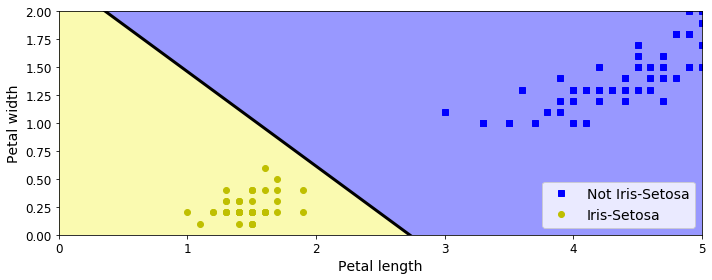

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot.png")
plt.show()

# Convolutional Neural Networks

> [REF2] https://m2dsupsdlclass.github.io/lectures-labs/slides/03_conv_nets/index.html#1

### Let's start with LeNet !

<img src="images/lenet.png">

<img src="images/lenet_example.png">

## Discrete Convolutions

<img src="images/discrete_conv.png">

## Discrete 2D Convolutions

<img src="images/2d_conv.png">

> Here, a convolution kernel f is applied to the 2-d map g

<img src="images/conv_kernel_vis_gif.gif">

> Convolution can be done to sharpen the previous layers as well by proper padding unit strides.

<img src="images/conv_operation_vis.gif">

# Activation Functions

In [7]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

def elu(z, alpha=1):
    return np.where(z<0, alpha*(np.exp(z)-1), z)

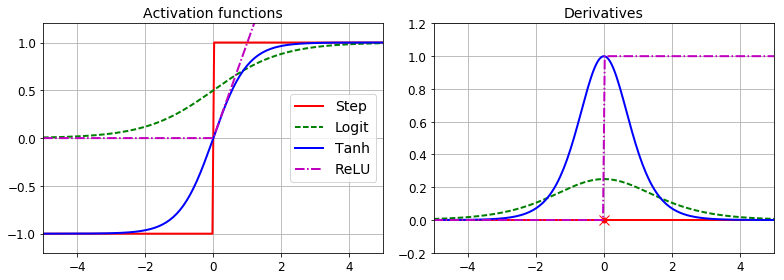

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot.png")
plt.show()

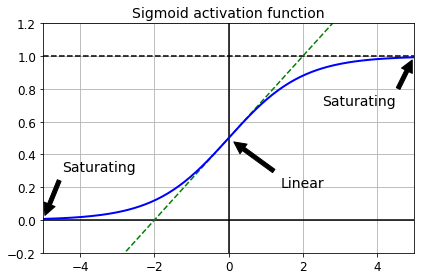

In [9]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot.png")
plt.show()

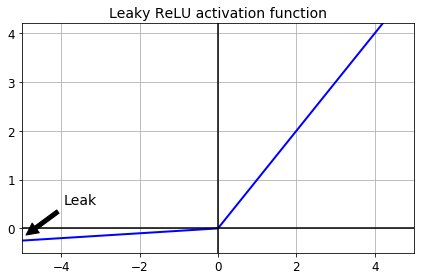

In [10]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot.png")
plt.show()

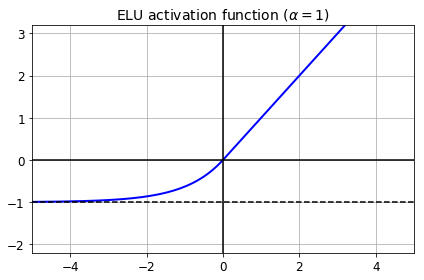

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot.png")
plt.show()

## Strides, Padding and Feature Maps

<img src = "images/conv_kernel_vis_gif.gif">

> Stride is the amount of pixels by which the kernel is shifted in the X and Y directions. In the GIF above, stride is (1,1) in (h,w); meaning we shift the kernel by one pixel in the horizontal and vertical directions.    

> Padding is the amount of pixels added to all sides of the 2D images, to allow creation of different shapes of convolved features. In the GIF above, there is no extra padding added.

> Read more about padding here: https://arxiv.org/pdf/1603.07285.pdf    
> See visualizations here: https://github.com/vdumoulin/conv_arithmetic

## VGG 16 Architecture, a complete neural network.

<img src="images/VGG16_arch.png">

### VGG Parameters

<img src="images/VGG16_params.png">

## Even better networks ?

<img src = "images/Imagenet_top_arch.png">

## AI's Hello World: MNIST. Our first network.

In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os

data_path = "./../data/MNIST/"
if not os.path.exists(data_path):
    os.makedirs(data_path)

mnist = input_data.read_data_sets(data_path, one_hot=True)

Extracting ./../data/MNIST/train-images-idx3-ubyte.gz
Extracting ./../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ./../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ./../data/MNIST/t10k-labels-idx1-ubyte.gz


In [13]:
# Parameters
learning_rate = 0.01
num_iters = 3000
batch_size = 64
display_step = 20

geometry = [28, 28]
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_classes = len(classes)
dropout_prob = 0.75

In [14]:
# Tensor Flow Graph Input
X = tf.placeholder(tf.float32, [None, geometry[0]*geometry[1]])
y = tf.placeholder(tf.float32, [None, num_classes])
dropout = tf.placeholder(tf.float32)

# AlexNet Weight & bias
# 3x3 conv, 1 input, 64 outputs
Wc1 = tf.Variable(tf.random_normal([3, 3, 1, 64]))
bc1 = tf.Variable(tf.random_normal([64]))

# 3x3 conv, 64 input, 128 outputs
Wc2 = tf.Variable(tf.random_normal([3, 3, 64, 128]))
bc2 = tf.Variable(tf.random_normal([128]))

# 3x3 conv, 128 input, 256 outputs
Wc3 = tf.Variable(tf.random_normal([3, 3, 128, 256]))
bc3 = tf.Variable(tf.random_normal([256]))

# Fully connected (Standard 3-layer MLP), 4*4*256 input, 1024 
Wf1 = tf.Variable(tf.random_normal([4*4*256, 1024]))
bf1 = tf.Variable(tf.random_normal([1024]))

Wf2 = tf.Variable(tf.random_normal([1024, 1024]))
bf2 = tf.Variable(tf.random_normal([1024]))

Wout = tf.Variable(tf.random_normal([1024, num_classes]))
bout = tf.Variable(tf.random_normal([num_classes]))

In [15]:
# Convolution Network

# Reshape input picture
input_X = tf.reshape(X, shape=[-1, 28, 28, 1])

# Stage 1 : Convolution -> ReLU -> Max Pooling -> Local Response Normalization -> Dropout
conv1 = tf.nn.conv2d(input_X, Wc1, strides = [1, 1, 1, 1], padding='SAME')
conv1 = tf.nn.relu(tf.nn.bias_add(conv1, bc1))
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')
conv1 = tf.nn.lrn(conv1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
conv1 = tf.nn.dropout(conv1, dropout)

# Stage 2 : Convolution -> ReLU -> Max Pooling -> Local Response Normalization -> Dropout
conv2 = tf.nn.conv2d(conv1, Wc2, strides = [1, 1, 1, 1], padding='SAME')
conv2 = tf.nn.relu(tf.nn.bias_add(conv2, bc2))
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')
conv2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')
conv2 = tf.nn.dropout(conv2, dropout)

# Stage 3 : Convolution -> ReLU -> Max Pooling -> Local Response Normalization -> Dropout
conv3 = tf.nn.conv2d(conv2, Wc3, strides = [1, 1, 1, 1], padding='SAME')
conv3 = tf.nn.relu(tf.nn.bias_add(conv3, bc3))
conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')
conv3 = tf.nn.lrn(conv3, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm3')
conv3 = tf.nn.dropout(conv3, dropout)

# Stage 4 : Fully connected : Linear -> ReLU -> Linear
fc1 = tf.reshape(conv3, [-1, Wf1.get_shape().as_list()[0]])
fc1 = tf.nn.relu(tf.add(tf.matmul(fc1, Wf1), bf1))
fc2 = tf.nn.relu(tf.add(tf.matmul(fc1, Wf2), bf2))

out = tf.add(tf.matmul(fc2, Wout), bout)

In [16]:
# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
init = tf.global_variables_initializer()

# Launch the Graph
with tf.Session() as sess:
    sess.run(init)
    
    # Train
    for epoch in range(1, num_iters+1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training data
        
        sess.run(optimizer, feed_dict={X: batch_xs, y: batch_ys, dropout: dropout_prob})
        
        if epoch % 100 == 0:
            loss = sess.run(cost, feed_dict={X: batch_xs, y: batch_ys, dropout: 1.})
            print("Epoch : ", epoch, " loss=" , loss)
    
    print("Optimization Finishied")
    
    # Test
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                                             y: mnist.test.labels, 
                                                             dropout: 1.}) )

# Data Augmentation

Often for custom problems, we won't have enough data to work with. In those cases where image data is scarse, we can do data augmentation methods to induce some variance in the original data thereby generating multiple images of the same label. These variances can be small changes in the orientation, rotation, zoom, random crops etc. which makes the image different enough for the neural network to consider them as seperate images. Let us see some data augmentation methods in Keras.

"""
Current Image Generator in Keras (V 2.0)
"""
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())

In [17]:
from keras.preprocessing import image, sequence
import numpy as np
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, zoom_range=0.2, shear_range=0.15,
       channel_shift_range=10., horizontal_flip=True)

Using TensorFlow backend.


In [18]:
# Create a 'batch' of a single image
from scipy import misc, ndimage

from matplotlib import pyplot as plt
img = np.expand_dims(ndimage.imread('images/car.jpg'),0)
# Request the generator to create batches from this image
aug_iter = gen.flow(img)

In [19]:
# Get eight examples of these augmented images
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]

In [20]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    plt.show()

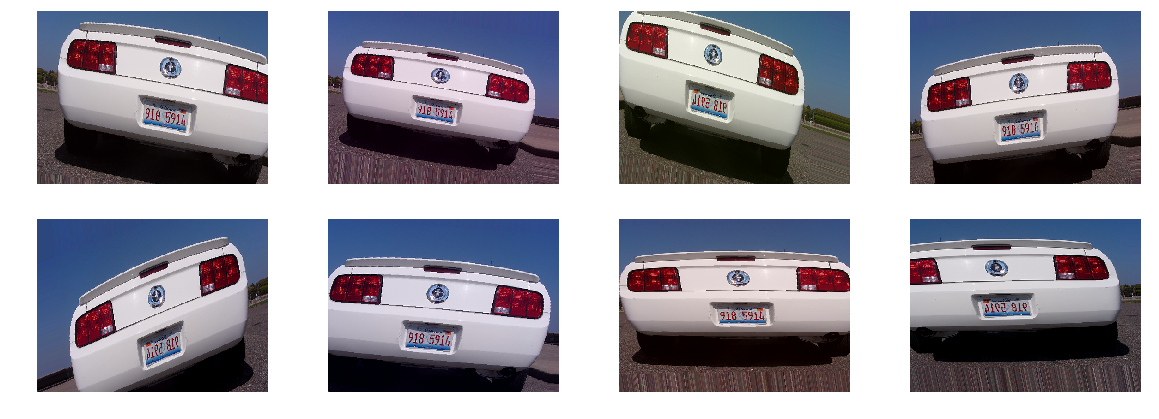

In [21]:
# Augmented data
plots(aug_imgs, (20,7), 2)

### Great work ! Let's build our own network in the next Session :)